In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


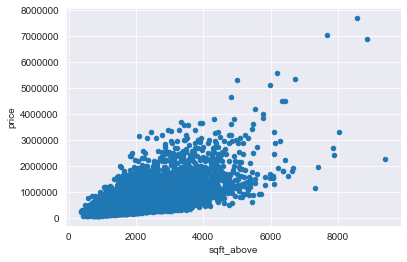

In [48]:
df.plot(kind = 'scatter', x = 'sqft_above', y='price')

In [49]:
df.lat.min()

47.1559

In [50]:
df.price.mean()

540296.5735055795

In [51]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [52]:
df.dropna(axis=0, subset=['view'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       19164 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [53]:
df.waterfront.value_counts(normalize = True)

0.0    0.992434
1.0    0.007566
Name: waterfront, dtype: float64

In [54]:
df['waterfront'].fillna("?", inplace=True)

wf_prob = [0.992434, .007566]
prob = [i/sum(wf_prob) for i in wf_prob]

def impute_waterfront(value):
    if value == "?":
        return np.random.choice([0.0, 1.0], p=prob)
    else:
        return value
    
df.waterfront = df.waterfront.map(lambda x: impute_waterfront(x))

In [55]:
df.drop(labels=['yr_renovated'], axis=1, inplace=True)

In [56]:
new_basement = df[df['sqft_basement'] != '?']
new_basement.sqft_basement.astype('float').describe()

count    21082.000000
mean       291.359975
std        442.007858
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [57]:
basement_mean = new_basement.sqft_basement.astype('float').mean()

def impute_basement(value):
    if value == "?":
        return basement_mean
    else:
        return value
    
df.sqft_basement = df.sqft_basement.map(lambda x: impute_basement(x)).astype('float')

display(df.info())
df['sqft_basement'].value_counts(normalize=True).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.5+ MB


None

0.000000      0.594316
291.359975    0.020990
600.000000    0.010031
500.000000    0.009706
700.000000    0.009613
Name: sqft_basement, dtype: float64

In [58]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month

display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288])

array([10, 12,  2, ...,  6,  1, 10])

In [59]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.000664,0.011592,-0.023944,0.008331,-0.010967,-0.004432,0.021609,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.012328,-0.012432
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.251807,0.395734,0.035393,0.668307,0.605695,0.320197,0.054273,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.011269,-0.009691
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.005272,0.078523,0.026402,0.356095,0.479148,0.298345,0.155462,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.001617,-0.000876
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.059352,0.186451,-0.126682,0.665312,0.686173,0.278673,0.507565,-0.204435,0.024487,0.225025,0.569139,0.088854,0.006596,0.007133
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.098757,0.282532,-0.059783,0.762398,0.876553,0.428988,0.318217,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011207,0.011968
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.020034,0.075298,-0.008375,0.115122,0.184325,0.015370,0.052646,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003434,-0.003504
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020419,0.028436,-0.264138,0.458694,0.523367,-0.242840,0.489410,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013170,0.013782
waterfront,-0.000664,0.251807,-0.005272,0.059352,0.098757,0.020034,0.020419,1.000000,0.367768,0.014942,0.082362,0.067608,0.079274,-0.023442,0.026486,-0.013005,-0.032339,0.080652,0.028478,0.009561,0.008715
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.367768,1.000000,0.045735,0.249727,0.166299,0.273382,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.004329,-0.005327
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.014942,0.045735,1.000000,-0.147326,-0.158830,0.168548,-0.361398,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.021922,0.022347


In [60]:
pd.set_option('display.max_columns', 500)
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.000664,0.011592,-0.023944,0.008331,-0.010967,-0.004432,0.021609,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.012328,-0.012432
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.251807,0.395734,0.035393,0.668307,0.605695,0.320197,0.054273,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.011269,-0.009691
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.005272,0.078523,0.026402,0.356095,0.479148,0.298345,0.155462,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.001617,-0.000876
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.059352,0.186451,-0.126682,0.665312,0.686173,0.278673,0.507565,-0.204435,0.024487,0.225025,0.569139,0.088854,0.006596,0.007133
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.098757,0.282532,-0.059783,0.762398,0.876553,0.428988,0.318217,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011207,0.011968
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.020034,0.075298,-0.008375,0.115122,0.184325,0.015370,0.052646,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003434,-0.003504
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020419,0.028436,-0.264138,0.458694,0.523367,-0.242840,0.489410,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013170,0.013782
waterfront,-0.000664,0.251807,-0.005272,0.059352,0.098757,0.020034,0.020419,1.000000,0.367768,0.014942,0.082362,0.067608,0.079274,-0.023442,0.026486,-0.013005,-0.032339,0.080652,0.028478,0.009561,0.008715
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.367768,1.000000,0.045735,0.249727,0.166299,0.273382,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.004329,-0.005327
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.014942,0.045735,1.000000,-0.147326,-0.158830,0.168548,-0.361398,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.021922,0.022347


In [61]:
abs(df.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


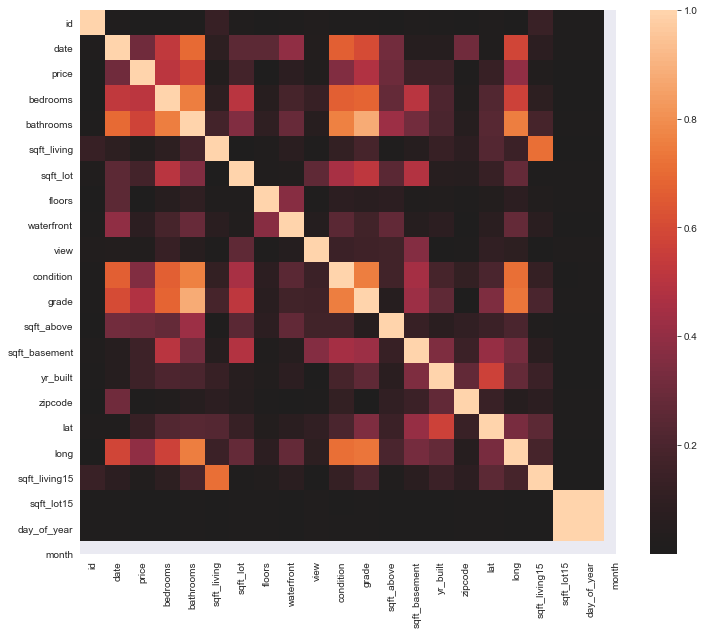

In [62]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df.columns.values, yticklabels=df.columns.values);

In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df.drop(['price','date','zipcode','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.695      
Dependent Variable:        price                  AIC:                      587315.3728
Date:                      2020-07-16 22:35       BIC:                      587466.9432
No. Observations:          21534                  Log-Likelihood:           -2.9364e+05
Df Model:                  18                     F-statistic:              2721.      
Df Residuals:              21515                  Prob (F-statistic):       0.00       
R-squared:                 0.695                  Scale:                    4.0929e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -36698729.7235 1590163.0161 -23.0786 0.0000 -39815567.3077 -33581892.1392
bedrooms         -34739.1482    1910.0438 -18.1876 0.0000    -38482.9758    -30995.3205
bathrooms         44772.0812    3260.2665  13.7326 0.0000     38381.7167     51162.4457
sqft_living          80.9499      21.3506   3.7915 0.0002        39.1012       122.7986
sqft_lot              0.1190       0.0482   2.4690 0.0136         0.0245         0.2135
floors             2152.4969    3604.9367   0.5971 0.5504     -4913.4467      9218.4406
waterfront       552026.3389   17250.8952  31.9999 0.0000    518213.3033    585839.3745
view              53537.7396    2115.9316  25.3022 0.0000     49390.3565     57685.1227
condition         29600.6845    2319.8756  12.7596 0.0000     25053.5562     34147.8129
grade             97977.6020    2171.9880  45.1096 0.0000     93720.3443    102234.8596
sqft_above           98.9110      21.3612   4.6304 0.0000        57.0415       140.7804
sqft_basement        65.3080      21.3434   3.0599 0.0022        23.4735       107.1426
yr_built          -2588.0591      68.8515 -37.5890 0.0000     -2723.0132     -2453.1051
lat              558300.9234   10538.3912  52.9778 0.0000    537644.8942    578956.9526
long            -118961.7695   11993.0678  -9.9192 0.0000   -142469.0728    -95454.4661
sqft_living15        25.8178       3.4547   7.4733 0.0000        19.0464        32.5892
sqft_lot15           -0.3865       0.0738  -5.2392 0.0000        -0.5311        -0.2419
day_of_year        -444.8425     159.7227  -2.7851 0.0054      -757.9107      -131.7742
month             10514.0587    4857.8176   2.1644 0.0304       992.3755     20035.7419
---------------------------------------------------------------------------------------
Omnibus:                  18378.636            Durbin-Watson:               1.992      
Prob(Omnibus):            0.000                Jarque-Bera (JB):            1836068.846
Skew:                     3.593                Prob(JB):                    0.000      
Kurtosis:                 47.662               Condition No.:               58276316   
=======================================================================================
* The condition number is large (6e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [64]:
outcome = 'price'
x_cols = df.drop(['price','date','zipcode','floors','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.695      
Dependent Variable:        price                  AIC:                      587313.7297
Date:                      2020-07-16 22:35       BIC:                      587457.3227
No. Observations:          21534                  Log-Likelihood:           -2.9364e+05
Df Model:                  17                     F-statistic:              2881.      
Df Residuals:              21516                  Prob (F-statistic):       0.00       
R-squared:                 0.695                  Scale:                    4.0928e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -36863395.3165 1566043.4678 -23.5392 0.0000 -39932956.7872 -33793833.8459
bedrooms         -34772.8390    1909.1816 -18.2135 0.0000    -38514.9768    -31030.7012
bathrooms         45300.4641    3137.8274  14.4369 0.0000     39150.0895     51450.8387
sqft_living          80.0562      21.2977   3.7589 0.0002        38.3111       121.8013
sqft_lot              0.1184       0.0482   2.4561 0.0141         0.0239         0.2128
waterfront       552065.1799   17250.5146  32.0028 0.0000    518252.8904    585877.4694
view              53581.9377    2114.6048  25.3390 0.0000     49437.1552     57726.7202
condition         29492.7869    2312.7924  12.7520 0.0000     24959.5420     34026.0318
grade             98093.0872    2163.3270  45.3436 0.0000     93852.8056    102333.3688
sqft_above          100.1574      21.2586   4.7114 0.0000        58.4890       141.8258
sqft_basement        65.3965      21.3425   3.0641 0.0022        23.5636       107.2294
yr_built          -2579.7810      67.4402 -38.2528 0.0000     -2711.9689     -2447.5932
lat              558950.3412   10481.9594  53.3250 0.0000    538404.9224    579495.7599
long            -119937.5411   11881.0297 -10.0949 0.0000   -143225.2415    -96649.8408
sqft_living15        25.5606       3.4277   7.4571 0.0000        18.8421        32.2791
sqft_lot15           -0.3880       0.0737  -5.2623 0.0000        -0.5325        -0.2434
day_of_year        -445.6357     159.7147  -2.7902 0.0053      -758.6885      -132.5830
month             10542.0880    4857.5181   2.1703 0.0300      1020.9918     20063.1841
---------------------------------------------------------------------------------------
Omnibus:                  18361.175            Durbin-Watson:               1.992      
Prob(Omnibus):            0.000                Jarque-Bera (JB):            1829745.699
Skew:                     3.588                Prob(JB):                    0.000      
Kurtosis:                 47.585               Condition No.:               57393246   
=======================================================================================
* The condition number is large (6e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [65]:
norm_candidates = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15']

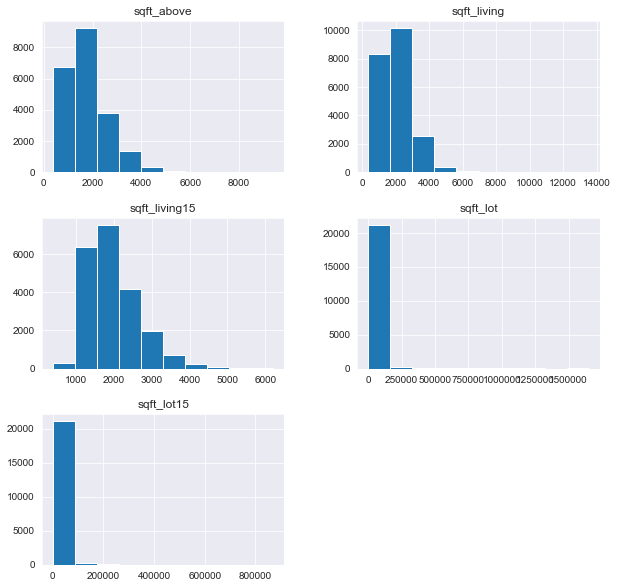

In [66]:
df[norm_candidates].hist(figsize=(10,10));

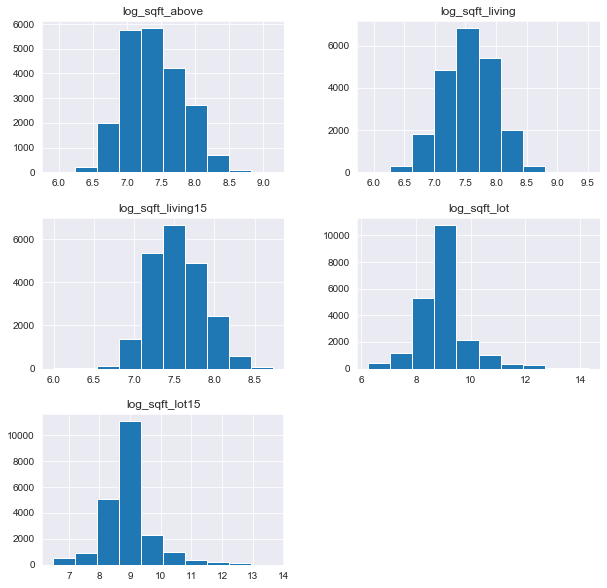

In [67]:
df_log = df.copy()

log_sqft_living = np.log(df['sqft_living'])
log_sqft_lot = np.log(df['sqft_lot'])
log_sqft_above = np.log(df['sqft_above'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_lot15 = np.log(df['sqft_lot15'])

logs = ['log_sqft_above', 'log_sqft_living', 'log_sqft_living15' , 'log_sqft_lot', 'log_sqft_lot15']

df_log['log_sqft_above'] = log_sqft_above
df_log['log_sqft_living'] = log_sqft_living
df_log['log_sqft_living15'] = log_sqft_living15
df_log['log_sqft_lot'] = log_sqft_lot
df_log['log_sqft_lot15'] = log_sqft_lot15

df_log[logs].hist(figsize=(10,10));

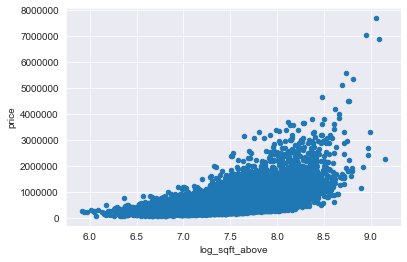

In [68]:
df_log.plot(kind = 'scatter', x = 'log_sqft_above', y = 'price')

In [69]:
df_log.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.000664,0.011592,-0.023944,0.008331,-0.010967,-0.004432,0.021609,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.012328,-0.012432,-0.001617,-0.001901,-0.003106,-0.149841,-0.147627
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.251807,0.395734,0.035393,0.668307,0.605695,0.320197,0.054273,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.011269,-0.009691,0.543377,0.612280,0.544221,0.161751,0.147952
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.005272,0.078523,0.026402,0.356095,0.479148,0.298345,0.155462,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.001617,-0.000876,0.515985,0.621671,0.406227,0.184993,0.162340
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.059352,0.186451,-0.126682,0.665312,0.686173,0.278673,0.507565,-0.204435,0.024487,0.225025,0.569139,0.088854,0.006596,0.007133,0.695548,0.761960,0.571223,0.100529,0.091949
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.098757,0.282532,-0.059783,0.762398,0.876553,0.428988,0.318217,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011207,0.011968,0.843334,0.954673,0.732090,0.344998,0.321388
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.020034,0.075298,-0.008375,0.115122,0.184325,0.015370,0.052646,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003434,-0.003504,0.163794,0.150194,0.145439,0.638078,0.549490
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020419,0.028436,-0.264138,0.458694,0.523367,-0.242840,0.489410,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013170,0.013782,0.546960,0.367001,0.274554,-0.238211,-0.228029
waterfront,-0.000664,0.251807,-0.005272,0.059352,0.098757,0.020034,0.020419,1.000000,0.367768,0.014942,0.082362,0.067608,0.079274,-0.023442,0.026486,-0.013005,-0.032339,0.080652,0.028478,0.009561,0.008715,0.056385,0.074966,0.073674,0.069480,0.078260
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.367768,1.000000,0.045735,0.249727,0.166299,0.273382,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.004329,-0.005327,0.157283,0.245362,0.263133,0.121992,0.119399
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.014942,0.045735,1.000000,-0.147326,-0.158830,0.168548,-0.361398,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.021922,0.022347,-0.150583,-0.049835,-0.089239,0.074406,0.080398


In [70]:
df_log = df_log.drop(['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15'], axis=1)
df_log.head(2)

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,286,10,7.073270,7.073270,7.200425,8.639411,8.639411
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,343,12,7.682482,7.851661,7.432484,8.887653,8.941022


In [71]:
x_cols = df_log.drop(['price','date','id','zipcode'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model = smf.ols(formula=f, data=df_log).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
===========================================================================================
Model:                       OLS                     Adj. R-squared:            0.674      
Dependent Variable:          price                   AIC:                       588690.3933
Date:                        2020-07-16 22:35        BIC:                       588841.9637
No. Observations:            21534                   Log-Likelihood:            -2.9433e+05
Df Model:                    18                      F-statistic:               2479.      
Df Residuals:                21515                   Prob (F-statistic):        0.00       
R-squared:                   0.675                   Scale:                     4.3628e+10 
-------------------------------------------------------------------------------------------
                      Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
-------------------------------------------------------------------------------------------
Intercept         -30601400.6190 1714578.9152 -17.8478 0.0000 -33962102.6035 -27240698.6346
bedrooms             -17415.7626    2045.6157  -8.5137 0.0000    -21425.3212    -13406.2040
bathrooms             79951.9997    3349.4025  23.8705 0.0000     73386.9222     86517.0773
floors                -6346.1322    4090.7257  -1.5513 0.1208    -14364.2584      1671.9940
waterfront           570076.4951   17829.3718  31.9740 0.0000    535129.6024    605023.3877
view                  50405.8230    2189.8078  23.0184 0.0000     46113.6371     54698.0088
condition             28209.6788    2398.7305  11.7603 0.0000     23507.9889     32911.3687
grade                131622.1213    2168.9173  60.6856 0.0000    127370.8823    135873.3604
sqft_basement           295.0497       8.8398  33.3775 0.0000       277.7231       312.3764
yr_built              -2953.1766      70.9518 -41.6223 0.0000     -3092.2474     -2814.1058
lat                  550736.5330   10966.7028  50.2190 0.0000    529240.9811    572232.0849
long                 -66393.1076   12726.5848  -5.2169 0.0000    -91338.1588    -41448.0564
day_of_year            -387.0541     164.9141  -2.3470 0.0189      -710.2980       -63.8102
month                  8798.4900    5015.6574   1.7542 0.0794     -1032.5709     18629.5509
log_sqft_above       578745.4637   16762.4202  34.5264 0.0000    545889.8755    611601.0520
log_sqft_living     -459082.5836   18182.6588 -25.2484 0.0000   -494721.9450   -423443.2223
log_sqft_living15     83652.6994    7327.7093  11.4159 0.0000     69289.8452     98015.5537
log_sqft_lot           7494.2449    4165.2969   1.7992 0.0720      -670.0463     15658.5361
log_sqft_lot15       -16771.2835    4517.5260  -3.7125 0.0002    -25625.9699     -7916.5971
-------------------------------------------------------------------------------------------
Omnibus:                    19710.670             Durbin-Watson:                1.986      
Prob(Omnibus):              0.000                 Jarque-Bera (JB):             2516341.659
Skew:                       3.960                 Prob(JB):                     0.000      
Kurtosis:                   55.362                Condition No.:                2417068    
===========================================================================================
* The condition number is large (2e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df_log
y = data['price']
X = data.drop(['price','date','id','zipcode'], axis = 1)

In [73]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
len(y_test)

4307

In [75]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 45036998030.22959
Test Mean Squarred Error: 37915303358.16802


In [76]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 212219.22163232433
Test Root Mean Squarred Error: 194718.52340793883


In [77]:
df_final = df_log

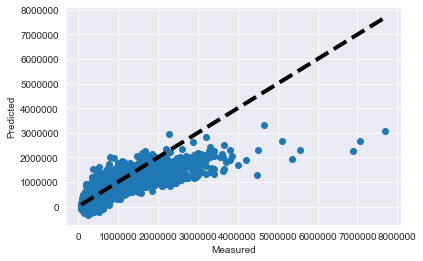

In [78]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

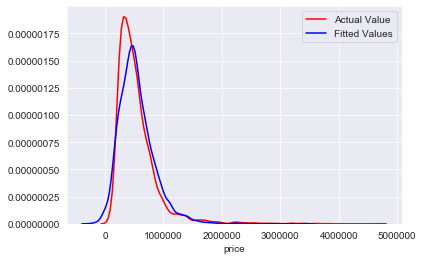

In [79]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

### Dealing with transformations

**Example A: No transformations**  

DV = Intercept + B1 * IV + Error  
"One unit increase in IV is associated with a (B1) unit increase in DV."

**Example B: Outcome transformed**

log(DV) = Intercept + B1 * IV + Error   
"One unit increase in IV is associated with a (B1 * 100) percent increase in DV."

**Example C: Exposure transformed**

DV = Intercept + B1 * log(IV) + Error   
"One percent increase in IV is associated with a (B1 / 100) unit increase in DV."

**Example D: Outcome transformed and exposure transformed**

log(DV) = Intercept + B1 * log(IV) + Error   
"One percent increase in IV is associated with a (B1) percent increase in DV."

https://stats.stackexchange.com/questions/18480/interpretation-of-log-transformed-predictor-and-or-response

### Dealing with zipcodes

In [80]:
df_test = df_log.copy()

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
id                   21534 non-null int64
date                 21534 non-null datetime64[ns]
price                21534 non-null float64
bedrooms             21534 non-null int64
bathrooms            21534 non-null float64
floors               21534 non-null float64
waterfront           21534 non-null float64
view                 21534 non-null float64
condition            21534 non-null int64
grade                21534 non-null int64
sqft_basement        21534 non-null float64
yr_built             21534 non-null int64
zipcode              21534 non-null int64
lat                  21534 non-null float64
long                 21534 non-null float64
day_of_year          21534 non-null int64
month                21534 non-null int64
log_sqft_above       21534 non-null float64
log_sqft_living      21534 non-null float64
log_sqft_living15    21534 non-null float64
log_sqft_lot        

In [82]:
col1        = 'lat'
col2        = 'long'
conditions  = [ (df_test[col1] > 47.5), (df_test[col1] < 47.5) ]
choices     = [ "1", '2']

In [83]:
df_test["sector"] = np.select(conditions, choices, default=np.nan)

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 23 columns):
id                   21534 non-null int64
date                 21534 non-null datetime64[ns]
price                21534 non-null float64
bedrooms             21534 non-null int64
bathrooms            21534 non-null float64
floors               21534 non-null float64
waterfront           21534 non-null float64
view                 21534 non-null float64
condition            21534 non-null int64
grade                21534 non-null int64
sqft_basement        21534 non-null float64
yr_built             21534 non-null int64
zipcode              21534 non-null int64
lat                  21534 non-null float64
long                 21534 non-null float64
day_of_year          21534 non-null int64
month                21534 non-null int64
log_sqft_above       21534 non-null float64
log_sqft_living      21534 non-null float64
log_sqft_living15    21534 non-null float64
log_sqft_lot        

In [85]:
df_test.sector.value_counts()

1      14949
2       6582
nan        3
Name: sector, dtype: int64

In [86]:
df_test.loc[(df_test['lat'] > 47.5 ) & (df_test['long'] > -122.5), "sector_2"] = 1

In [87]:
df_test.sector_2.value_counts()

1.0    14949
Name: sector_2, dtype: int64

In [88]:
y_predicted = linreg.predict(X)

In [89]:
residuals = y - y_predicted

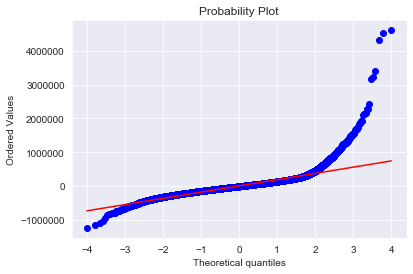

In [90]:
from scipy.stats import probplot

_ = probplot(residuals, plot=plt)

In [97]:
data1 = df.drop(['id', 'date'], axis = 1)
y1 = data1.price
data1 = data1.drop(['price'], axis = 1)

In [101]:
linreg1 = LinearRegression()
linreg1.fit(data1, y1)
print(linreg1.score(data1, y1))

0.6993935003846671


In [102]:
y_predict = linreg1.predict(data1)
residuals1 = y - y_predict

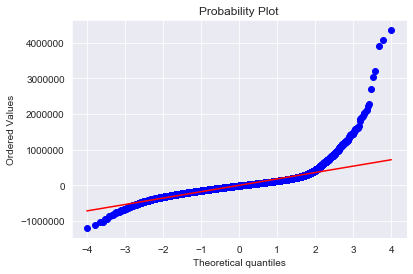

In [103]:
_ = probplot(residuals1, plot=plt)